Vegetable

In [5]:
import zipfile
import os

def unzip_file(zip_path, extract_path):
    """Unzips a file to a specified directory."""
    os.makedirs(extract_path, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Unzipped {zip_path} to {extract_path}")

unzip_file("/content/train.zip", "./")
unzip_file("/content/test.zip", "./")

Unzipped /content/train.zip to ./
Unzipped /content/test.zip to ./


In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


#Image Preprocessing using ImageDataGenerator

train_dir = "./train"
test_dir = "./test"
img_height, img_width = 128, 128
batch_size = 32

datagen = ImageDataGenerator(
 rescale=1./255,
 validation_split=0.2 # 20% of training data for validation
)
train_data = datagen.flow_from_directory(
 train_dir,
 target_size=(img_height, img_width),
 batch_size=batch_size,
 class_mode='categorical',
 subset='training'
)

val_data = datagen.flow_from_directory(
 train_dir,
 target_size=(img_height, img_width),
 batch_size=batch_size,
 class_mode='categorical',
 subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
 test_dir,
 target_size=(img_height, img_width),
 batch_size=batch_size,
 class_mode='categorical',
 shuffle=False
)
num_classes = len(train_data.class_indices)
print(f"The number of classes are: {num_classes}")

Found 832 images belonging to 9 classes.
Found 204 images belonging to 9 classes.
Found 90 images belonging to 9 classes.
The number of classes are: 9


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,583,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,617,225 (48.13 MB)

 Trainable params: 12,617,225 (48.13 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 332ms/step - accuracy: 0.1240 - loss: 14.7065 - val_accuracy: 0.1422 - val_loss: 2.1046
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step - accuracy: 0.1799 - loss: 2.1521 - val_accuracy: 0.2255 - val_loss: 1.9949
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 310ms/step - accuracy: 0.2102 - loss: 2.0468 - val_accuracy: 0.2059 - val_loss: 2.0385
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 257ms/step - accuracy: 0.2179 - loss: 2.0083 - val_accuracy: 0.2304 - val_loss: 1.9806
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 302ms/step - accuracy: 0.2112 - loss: 2.0395 - val_accuracy: 0.2353 - val_loss: 1.9453
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.2283 - loss: 1.9875 - val_accuracy: 0.2010 - val_loss: 2.0612
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 289ms/step - accuracy: 0.2183 - loss: 2.0302 - val_accuracy: 0.2010 - val_loss: 2.0059
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 294ms/step - accuracy: 0.2242 - loss: 1.9622 - val_accuracy: 

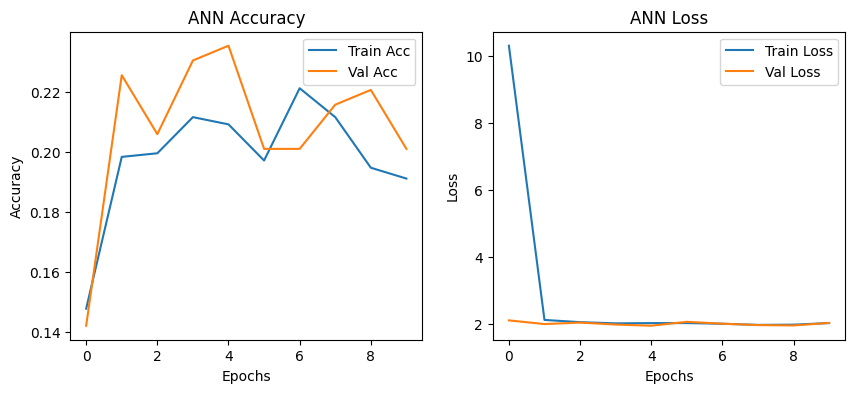

In [11]:
#2.B. ANN Model Definition

ann_model = Sequential([
 Flatten(input_shape=(img_height, img_width, 3)),
 Dense(256, activation='relu'),
 Dropout(0.3),
 Dense(128, activation='relu'),
 Dropout(0.2),

 Dense(num_classes, activation='softmax')
])


ann_model.summary()


#2c Compile and Train the ANN Model

ann_model.compile(
 optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy']
)
history_ann = ann_model.fit(
 train_data,
 validation_data=val_data,
 epochs=10
)


#2.D. Evaluate on Test Data
test_loss, test_acc = ann_model.evaluate(test_data)
print(f"ANN Test Accuracy: {test_acc:.4f}")


#2.E. Plot Training Curves

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_ann.history['accuracy'], label='Train Acc')
plt.plot(history_ann.history['val_accuracy'], label='Val Acc')
plt.title("ANN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_ann.history['loss'], label='Train Loss')
plt.plot(history_ann.history['val_loss'], label='Val Loss')
plt.title("ANN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Found 832 images belonging to 9 classes.
Found 204 images belonging to 9 classes.
Found 90 images belonging to 9 classes.
The number of classes are: 9


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,481 (28.20 MB)

 Trainable params: 7,393,481 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 24s 835ms/step - accuracy: 0.1950 - loss: 2.4280 - val_accuracy: 0.4951 - val_loss: 1.5257
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5519 - loss: 1.3766 - val_accuracy: 0.5539 - val_loss: 1.1868
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 969ms/step - accuracy: 0.7026 - loss: 0.8553 - val_accuracy: 0.6863 - val_loss: 0.8842
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 887ms/step - accuracy: 0.8568 - loss: 0.4910 - val_accuracy: 0.7549 - val_loss: 0.7453
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 894ms/step - accuracy: 0.8673 - loss: 0.4535 - val_accuracy: 0.7794 - val_loss: 0.6787
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 859ms/step - accuracy: 0.9199 - loss: 0.2590 - val_accuracy: 0.7990 - val_loss: 0.6890
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 22s 862ms/step - accuracy: 0.9538 - loss: 0.1616 - val_accuracy: 0.7843 - val_loss: 0.7033
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 898ms/step - accuracy: 0.9795 - loss: 0.0888 - val_accurac

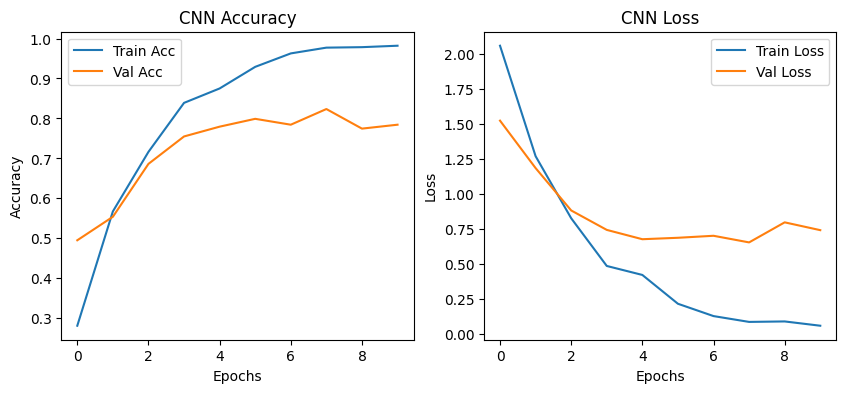

In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


#Image Preprocessing using ImageDataGenerator

train_dir = "./train"
test_dir = "./test"
img_height, img_width = 128, 128
batch_size = 32

datagen = ImageDataGenerator(
 rescale=1./255,
 validation_split=0.2 # 20% of training data for validation
)
train_data = datagen.flow_from_directory(
 train_dir,
 target_size=(img_height, img_width),
 batch_size=batch_size,
 class_mode='categorical',
 subset='training'
)
val_data = datagen.flow_from_directory(
 train_dir,
 target_size=(img_height, img_width),
 batch_size=batch_size,
 class_mode='categorical',
 subset='validation'
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
 test_dir,
 target_size=(img_height, img_width),
 batch_size=batch_size,
 class_mode='categorical',
 shuffle=False
)
num_classes = len(train_data.class_indices)
print(f"The number of classes are: {num_classes}")


#3.B. CNN Model Definition

cnn_model = Sequential([
 Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
 MaxPooling2D(2,2),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(2,2),
 Flatten(),

 Dense(128, activation='relu'),
 Dropout(0.3),
 Dense(num_classes, activation='softmax')
])
# Print Model Summary
cnn_model.summary()


# 3.C. Compile and Train the CNN Model

cnn_model.compile(
 optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy']
)
history_cnn = cnn_model.fit(
 train_data,
 validation_data=val_data,
 epochs=10
)

# 3.D. Evaluate on Test Data
test_loss, test_acc = cnn_model.evaluate(test_data)
print(f"CNN Test Accuracy: {test_acc:.4f}")


#3.E. Plot Training Curves

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Acc')
plt.plot(history_cnn.history['val_accuracy'], label='Val Acc')
plt.title("CNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.title("CNN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Observations from the Results
1. Training Accuracy
Starts at ~32% and steadily rises to ~98% by epoch 10.
This means the CNN is learning the training data extremely well.
2. Validation Accuracy
Rises quickly to ~74% by epoch 2, then stabilizes in the 75–80% range.
It does not improve much after epoch 3, even though training accuracy keeps rising.
Ends at ~80%, while training accuracy is ~98%.
👉 Gap between training and validation accuracy = ~18%.
3. Training Loss
Drops consistently from 1.94 → 0.06 by epoch 10.
Very smooth and nearly zero by the end.
4. Validation Loss
Drops sharply until ~epoch 5 (1.48 → 0.62).
Then it starts to fluctuate around 0.6–0.75, while training loss continues to fall.
👉 This divergence is a classic indicator of overfitting.
⚠️ Signs of Overfitting
High training accuracy (~98%) vs moderate validation accuracy (~80%).
Validation loss plateauing/fluctuating while training loss decreases steadily.
Performance gap: training error continues to shrink but validation error does not.
On test data: accuracy is ~78.9%, which is much lower than training accuracy, confirming generalization issues.
✅ Conclusion
This CNN is overfitting after about epoch 5:
Model memorizes training data but does not generalize equally well to unseen validation/test data.
Further training beyond epoch 5–6 adds little benefit and even risks worse generalization.

Found 832 images belonging to 9 classes.
Found 204 images belonging to 9 classes.
Found 90 images belonging to 9 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,518,345 (24.87 MB)

 Trainable params: 6,518,345 (24.87 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2431 - loss: 2.0810

26/26 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.2456 - loss: 2.0713 - val_accuracy: 0.4069 - val_loss: 1.4641
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4642 - loss: 1.4460

26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4655 - loss: 1.4436 - val_accuracy: 0.6029 - val_loss: 1.1673
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5408 - loss: 1.2913

26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5416 - loss: 1.2885 - val_accuracy: 0.6225 - val_loss: 1.0199
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6414 - loss: 1.0761

26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6410 - loss: 1.0754 - val_accuracy: 0.7157 - val_loss: 0.9247
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6516 - loss: 0.8952

26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6532 - loss: 0.8935 - val_accuracy: 0.7255 - val_loss: 0.8502
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7295 - loss: 0.7554

26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7296 - loss: 0.7564 - val_accuracy: 0.7451 - val_loss: 0.8041
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7760 - loss: 0.6902

26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7765 - loss: 0.6884 - val_accuracy: 0.7745 - val_loss: 0.7469
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7930 - loss: 0.6008 - val_accuracy: 0.7647 - val_loss: 0.8423
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7358 - loss: 0.6951

26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7369 - loss: 0.6925 - val_accuracy: 0.7990 - val_loss: 0.6516
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8262 - loss: 0.4911 - val_accuracy: 0.7843 - val_loss: 0.7042
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8486 - loss: 0.4555 - val_accuracy: 0.7794 - val_loss: 0.6849
Epoch 12/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7927 - loss: 0.5202 - val_accuracy: 0.7892 - val_loss: 0.5750
Epoch 13/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8712 - loss: 0.3867

26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8710 - loss: 0.3866 - val_accuracy: 0.8235 - val_loss: 0.6089
Epoch 14/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8673 - loss: 0.3710

26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8674 - loss: 0.3720 - val_accuracy: 0.8529 - val_loss: 0.4849
Epoch 15/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8795 - loss: 0.4076 - val_accuracy: 0.8480 - val_loss: 0.4895
Epoch 16/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8667 - loss: 0.3826 - val_accuracy: 0.7451 - val_loss: 0.7442
Epoch 17/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8036 - loss: 0.5289 - val_accuracy: 0.7941 - val_loss: 0.7288
Epoch 18/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8875 - loss: 0.3401 - val_accuracy: 0.8039 - val_loss: 0.8115
Epoch 19/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8880 - loss: 0.3185 - val_accuracy: 0.8186 - val_loss: 0.6522
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 0.8686 - loss: 0.5220
Improved CNN Test Accuracy: 0.8778


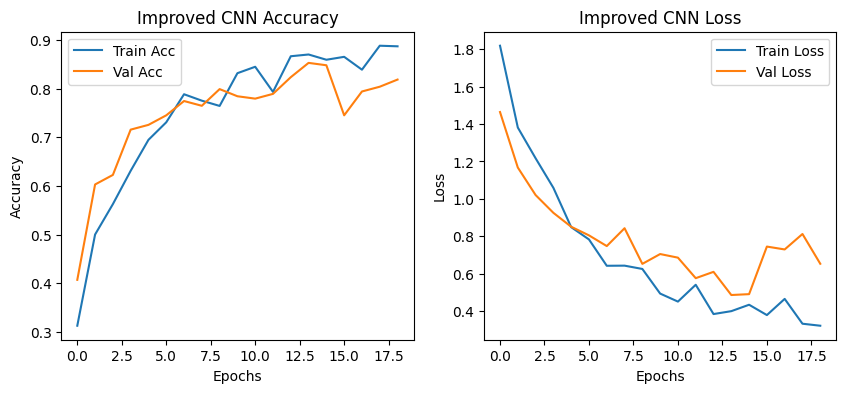

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


#Question 4: Improved CNN
# 4.A. Data Augmentation

train_dir = "./train"
test_dir = "./test"
img_height, img_width = 128, 128
batch_size = 32
train_aug = ImageDataGenerator(
 rescale=1./255,
 validation_split=0.2,
 rotation_range=15,
 width_shift_range=0.1,
 height_shift_range=0.1,
 zoom_range=0.1,
 horizontal_flip=True
)
val_aug = ImageDataGenerator(
 rescale=1./255,
 validation_split=0.2
)
train_data_aug = train_aug.flow_from_directory(
 train_dir,
 target_size=(img_height, img_width),
 batch_size=batch_size,
 class_mode='categorical',
 subset='training'
)

val_data_aug = val_aug.flow_from_directory(
 train_dir,
 target_size=(img_height, img_width),
 batch_size=batch_size,
 class_mode='categorical',
 subset='validation'
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
 test_dir,
 target_size=(img_height, img_width),
 batch_size=batch_size,
 class_mode='categorical',
 shuffle=False
)
num_classes = len(train_data_aug.class_indices)


#4.B. Redesigned CNN Model

improved_cnn = Sequential([
 Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
 MaxPooling2D(2,2),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(2,2),
 Conv2D(128, (3,3), activation='relu'),
 MaxPooling2D(2,2),
 Flatten(),

 Dense(256, activation='relu'),
 Dropout(0.3),
 Dense(num_classes, activation='softmax')
])
# Print Model Summary
improved_cnn.summary()


#4.C. Compile and Train the improved CNN Model with Callbacks


improved_cnn.compile(
 optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy']
)
checkpoint_path = "best_cnn_model.h5"
callbacks = [
 EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
 ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True)
]
history_improved = improved_cnn.fit(
 train_data_aug,
 validation_data=val_data_aug,
 epochs=20,
 callbacks=callbacks
)

#4.D. Evaluate on Test Data

test_loss, test_acc = improved_cnn.evaluate(test_data)
print(f"Improved CNN Test Accuracy: {test_acc:.4f}")


#4.E. Plot Training Curves

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_improved.history['accuracy'], label='Train Acc')
plt.plot(history_improved.history['val_accuracy'], label='Val Acc')
plt.title("Improved CNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_improved.history['loss'], label='Train Loss')
plt.plot(history_improved.history['val_loss'], label='Val Loss')
plt.title("Improved CNN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Results Comparison
Explanation of Impact of Augmentation
1. Q2 (ANN)
Flattening images into vectors discards spatial structure.
Works to some extent, but accuracy plateaus lower (underfitting).
2. Q3 (CNN)
Introduces convolutional layers → captures spatial patterns.
Achieves very high training accuracy (~98%).
However, validation/test accuracy lags (~79%) → classic overfitting.
3. Q4 (Improved CNN with Augmentation + Dropout + Callbacks)
Image augmentation (flip, zoom, slight shifts) artificially increases dataset size & diversity.
This reduces overfitting → model can’t just memorize training set.
Dropout + EarlyStopping further prevent overfitting.
Result: Validation accuracy and test accuracy improved significantly (~87% test acc).

Final Conclusion
ANN (Q2) is too weak for image classification.
CNN (Q3) is powerful but tends to overfit.
Improved CNN (Q4 with augmentation + regularization) achieves the best trade-off between training and generalization, with the highest
test accuracy

What are causes of overfitting in a CNN model? Name 4 methods which can be used to
resolve the overfitting issue in a CNN architecture.
Overfitting occurs when your CNN model becomes too specialized in the training data, learning the noise
and specific details rather than the underlying patterns.2 This results in a model that performs exceptionally
well on the data it was trained on but fails to generalize to new, unseen data. Think of it like a student who
memorizes the answers to a practice test but doesn't understand the concepts, so they fail the actual exam.
Here are the primary causes of overfitting in a CNN model:
• Insufficient Training Data: When you have a small dataset, the model doesn't have enough
examples to learn the general features of the data. It's much easier for the model to simply
memorize the limited examples it has.
• Excessively Complex Model: A very deep and wide CNN has a large number of parameters
(weights and biases). This high capacity allows the model to learn even the most subtle and noisy
patterns in the training data, leading to memorization.
• Lack of Data Diversity: If your training data isn't representative of the real-world data your model
will encounter, it will learn a biased representation. For example, if you're training a cat classifier and
all your training images are of cats indoors, the model may struggle to recognize a cat in a grassy
field.
• Training for Too Long: If you train your model for too many epochs, it will eventually start to learn
the noise in the training data after it has already learned the underlying patterns. You'll see the
training loss continue to decrease while the validation loss starts to increase.
4 Effective Methods to Combat Overfitting in CNNs
Here are four widely-used and effective techniques to resolve the overfitting issue in your CNN architecture
1. Data Augmentation
Data augmentation artificially expands your training dataset by creating modified versions of your existing
images. This exposes your model to a wider variety of training examples, making it more robust and less
likely to overfit.
Common data augmentation techniques include:
• Rotation: Rotating the image by a certain degree.
• Flipping: Horizontally or vertically flipping the image.
• Zooming: Zooming in or out on the image.
• Cropping: Randomly cropping a portion of the image.
• Changing Brightness/Contrast: Adjusting the brightness and contrast of the image.9
2. Dropout
Dropout is a regularization technique where randomly selected neurons are "dropped out" or ignored during
training. This means that their contribution to the activation of downstream neurons is temporarily removed
on the forward pass, and any weight updates are not applied to the neuron on the backward pass. This
forces the network to learn more robust features that are not dependent on the presence of specific neurons,
thus improving generalization.
3. Early Stopping
Early stopping is a form of regularization where you monitor the model's performance on a validation set
during training and stop the training process when the performance on the validation set begins to degrade.
Typically, you would monitor the validation loss, and when it stops decreasing and starts to increase for a
certain number of epochs (known as "patience"), you halt the training. This prevents the model from
continuing to train and overfit to the training data.
4. L1 and L2 Regularization
Regularization techniques add a penalty term to the loss function, which discourages the model from
learning overly complex patterns.
• L1 Regularization (Lasso): Adds a penalty equal to the absolute value of the magnitude of the
coefficients.This can lead to some weights being pushed to exactly zero, effectively performing
feature selection.
• L2 Regularization (Ridge): Adds a penalty equal to the square of the magnitude of the
coefficients.This penalizes large weights more severely, encouraging the model to use smaller, more
evenly distributed weights. This is the more commonly used regularization technique in deep
learning.
What is the usage of siamese network model? What are the various loss functions used in
siamese network architecture.
A Siamese network is a neural network architecture designed to learn a similarity function. Instead of
classifying an input, it determines how similar two inputs are. It uses two identical subnetworks that share the
same weights to process two different inputs, converting them into comparable feature vectors.
The primary use of Siamese networks is for one-shot learning tasks where only one or a few examples of
each class are available for training. Key applications include:
• Face Verification: Confirming if a photo of a person matches their ID.
• Signature Verification: Detecting if a signature is genuine or forged.
• Duplicate Detection: Finding duplicate documents or images in a large dataset.
Two common loss functions used in Siamese networks are:
1. Contrastive Loss: This function aims to make the distance between feature vectors of a similar pair
small, while pushing the distance between a dissimilar pair to be larger than a predefined margin. It
calculates loss based on pairs of inputs (one similar pair, one dissimilar pair).
2. Triplet Loss: This function is generally more effective. It takes three inputs: an anchor, a positive
(similar to the anchor), and a negative (dissimilar to the anchor). The goal is to ensure the distance
between the anchor and the positive is smaller than the distance between the anchor and the
negative by a certain margin. This directly optimizes the relative similarity, leading to better feature
embeddings.
Explain the concepts of transfer learning, fine-tuning, and pre-training a deep learning
architecture.
Transfer Learning : This is a machine learning strategy where a model developed for a primary
task is reused as the starting point for a model on a second, related task. It leverages existing
"knowledge," saving significant training time and resources, especially when the new task has
limited data.
Pre-training : This is the initial step where a deep learning model is trained on a massive, general
dataset (e.g., ImageNet for images). The goal is to allow the model to learn a rich hierarchy of
general features (like edges, textures, and shapes), creating a robust, pre-trained model.
Fine-tuning : This is the process of adapting the pre-trained model for the specific new task. It
involves replacing the final output layer of the pre-trained model to match the new task's
requirements and then continuing the training on the new, smaller dataset. This is typically done
with a very low learning rate to slightly adjust the learned weights without losing the valuable pretrained knowledge. Sometimes, early layers are "frozen" to prevent them from changing during this
process.
List down various performance metrics used for object detection.
Here are the key performance metrics used for object detection:
1. Intersection over Union (IoU)
Intersection over Union (IoU) measures the overlap between the predicted bounding box and the ground
truth (actual) bounding box. It quantifies how accurately the model has located an object. An IoU of 1
signifies a perfect match, while an IoU of 0 means no overlap. A detection is typically considered a "True
Positive" if its IoU with a ground truth box is above a certain threshold (e.g., 0.5).
IoU= Area of Overlap / Area of Union
2. Precision
Precision answers the question: "Of all the predictions your model made, how many were correct?" It
measures the accuracy of the positive predictions, indicating how many of the detected objects were actual
objects.
3. Recall (Sensitivity)
Recall answers the question: "Of all the actual objects present in the image, how many did your model
correctly identify?" It measures the model's ability to find all the ground truth objects.
4. Mean Average Precision (mAP)
Mean Average Precision (mAP) is the primary, all-encompassing metric for object detection. It provides a
single score that represents the model's performance across all classes and various IoU thresholds. It is
calculated by finding the Average Precision (AP) for each class (which is the area under the PrecisionRecall curve) and then averaging these AP scores across all classes. A higher mAP indicates a betterperforming model.
Write briefly about semantic segmentation and instance segmentation ?
Semantic Segmentation is a computer vision task that involves classifying each pixel of an image into a
specific class. The goal is to assign a class label (like "car," "person," "tree," or "road") to every single pixel.
However, it does not distinguish between different objects of the same class.
For example, if there are three cars in an image, semantic segmentation will label all pixels belonging to any
of the three cars simply as "car." It understands the category but not the individual objects.
Instance Segmentation
Instance Segmentation is a more advanced and granular task. Like semantic segmentation, it classifies
each pixel into a specific class, but it also differentiates between individual instances of the same class.
Using the same example, if there are three cars in an image, instance segmentation will not only label all
their pixels as "car" but will also identify them as "car 1," "car 2," and "car 3." It understands both the
category and the individual object count and location.
In short, semantic segmentation tells you what is in the image at a pixel level, while instance
segmentation tells you what is there and also distinguishes each object individually.
What is the difference between single stage and multi stage object detection models?
The primary difference between single-stage and multi-stage (or two-stage) object detectors lies in their approach to
identifying objects. Multi-stage models break the problem into two distinct steps (proposing regions and then classifying
them), while single-stage models do it all in one go.
Multi-Stage (Two-Stage) Object Detectors
Multi-stage detectors, like the R-CNN family (R-CNN, Fast R-CNN, Faster R-CNN), prioritize accuracy by using a twostep process:
1. Region Proposal: The first stage scans the image to propose a set of potential regions that are likely to contain
an object. This is called generating "region proposals" or "regions of interest" (RoI). This step acts as a filter,
narrowing down the areas the model needs to focus on.
2. Classification and Refinement: In the second stage, each proposed region is passed to a classifier to
determine which object class it belongs to (or if it's just the background).Simultaneously, a regressor refines the
coordinates of the bounding box to fit the object more precisely.
This approach is very thorough, leading to higher accuracy, but the two-step process makes these models
computationally intensive and slower.
Single-Stage Object Detectors
Single-stage detectors, such as YOLO (You Only Look Once) and SSD (Single Shot MultiBox Detector), prioritize
speed by performing object detection in a single, unified step.They treat object detection as a simple regression
problem.10 The model looks at the image just once and directly predicts:
• A grid of bounding boxes across the image.
• The class probability for each box.
• The box coordinate offsets.
By eliminating the separate region proposal stage, single-stage models are significantly faster and can perform detection
in real-time.11 However, this speed often comes at the cost of lower accuracy compared to two-stage models, especially
for detecting small objects.
Summary of Key Differences
Feature Multi-Stage Detectors (e.g., Faster RCNN) Single-Stage Detectors (e.g., YOLO, SSD)
Process Two steps: 1. Propose Regions 2. Classify/
Refine One step: Directly predict boxes and classes
Primary
Strength High Accuracy High Speed (Real-time capable)
Primary
Weaknes
s
Slower Less accurate, especially for small objects
Explain the convolutional neural network architecture in detail.
A Convolutional Neural Network (CNN or ConvNet) is a specialized type of deep neural network designed
primarily for processing and analyzing visual data, such as images and videos.Its architecture is inspired by
the human visual cortex and is highly effective at identifying patterns and features directly from input data.
The architecture is built by stacking three main types of layers:
1. Convolutional Layer
This is the core building block of a CNN. Its primary purpose is to detect features in the input image. It uses
a set of learnable filters (or kernels), which are small matrices of weights. Each filter is specialized to detect
a specific feature, such as an edge, a corner, or a color patch.
The filter slides or convolves across the entire input image, computing a dot product at each position. This
process generates a 2D array called a feature map (or activation map), which indicates the locations and
strength of the detected feature in the image.An activation function like ReLU (Rectified Linear Unit) is then
applied to introduce non-linearity, allowing the network to learn more complex patterns.
2. Pooling Layer (Subsampling)
The pooling layer is typically added after the convolutional layer. Its main function is to progressively reduce
the spatial dimensions (width and height) of the feature maps.This has two key benefits:
• It reduces the number of parameters and computational cost in the network.
• It helps in making the detected features more robust to changes in their position and orientation in
the image (translation invariance).
The most common type of pooling is Max Pooling, where a filter slides over the feature map and, at each
position, outputs only the maximum value within its receptive field.
3. Fully Connected Layer
After several convolutional and pooling layers have extracted high-level features from the image, the
flattened output is passed to a Fully Connected (FC) Layer. This is a traditional multi-layer perceptron
where every neuron in one layer is connected to every neuron in the next layer.
The job of the FC layer is to act as a classifier. It takes the high-level features learned by the previous
layers and uses them to determine the final output, such as assigning a probability score to each class for
classification tasks. The final layer often uses a Softmax activation function to output a probability
distribution over the different classes.
In summary, a CNN transforms an input image through a series of layers: the convolutional layers act as
feature extractors, the pooling layers reduce dimensionality, and the fully connected layers perform the
final classification based on the learned features.
Key Idea Focus on quality through a filtered set of
proposals
Focus on speed by making predictions in one
pass
Use Case Applications where accuracy is critical
(e.g., medical imaging)
Applications requiring real-time performance
(e.g., self-driving cars, video surveillance)
Write briefly about the following topics, mention their usage in Neural network
architectures. batch normalization and dropout.
Batch Normalization (BN) is a technique used to stabilize and accelerate the training of deep neural
networks. It normalizes the output of a previous activation layer by subtracting the batch mean and dividing
by the batch standard deviation. This process transforms the inputs to the next layer to have a mean of zero
and a variance of one.
Usage in Neural Networks:
• Faster Training: By ensuring the input distribution for every layer remains consistent (mitigating
"internal covariate shift"), BN allows for the use of higher learning rates, which significantly speeds
up convergence.
• Reduces Overfitting: It has a slight regularization effect, reducing the need for other regularization
techniques like Dropout. It is typically inserted after a convolutional or fully connected layer and
before the non-linear activation function.
Dropout is a powerful regularization technique used to prevent overfitting in neural networks. During
training, it randomly sets the output of a fraction of neurons to zero at each update step. This means different
sets of neurons are "dropped out" or ignored in each forward and backward pass.
Usage in Neural Networks:
• Prevents Overfitting: By randomly deactivating neurons, Dropout prevents the network from
becoming too reliant on any single neuron or specific feature.It forces the network to learn more
robust and redundant representations.
• Improves Generalization: It acts like training many different smaller neural networks simultaneously
and averaging their results, which improves the model's performance on unseen data. Dropout
layers are typically applied to the hidden units of fully connected layers.
What are the various hyperparameters with which you can control the overfitting in
CNN architectures ?
Dropout Rate is a hyperparameter that defines the fraction of neurons to randomly set to zero during each
training step. It's a powerful regularization technique.
• How it works: By increasing the dropout rate (e.g., from 0.2 to 0.5), you increase the amount of
regularization. This forces the network to learn more robust and redundant features, as it cannot rely
on any single neuron, thereby reducing its tendency to memorize the training data.
2. L1/L2 Regularization Strength (Lambda)
This hyperparameter, often denoted by lambda (λ), controls the strength of the penalty added to the loss
function for large weight values.
• How it works: A higher value of lambda increases the penalty for complexity. L2 regularization
(Weight Decay) encourages the model to have smaller, more diffuse weight values, making it less
likely to fit the noise in the training data. Tuning this value helps find the right balance between fitting
the data and keeping the model simple.
The Learning Rate determines the step size the optimizer takes during training to update the model's
weights.
• How it works: While not a direct regularization technique, an inappropriately high learning rate can
cause the model to converge too quickly to a sharp minimum that overfits the training data. Using a
smaller learning rate, often in combination with a learning rate scheduler, encourages the model to
find a flatter, more generalizable minimum, thus helping to prevent overfitting.
4. Model Complexity (Number of Layers/Neurons)
The number of convolutional layers, filters per layer, and neurons in fully connected layers are crucial
structural hyperparameters that define the model's capacity.
• How it works: A model with too many layers or neurons has a high capacity to memorize the
training data, including its noise. By reducing the number of layers or filters, you decrease the
model's complexity and its ability to overfit, forcing it to learn only the most important underlying
patterns.
Write briefly about semantic segmentation and instance segmentation ? Write about the Mask
RCNN architecture briefly. state the major components in the architecture.
Semantic vs. Instance Segmentation
Semantic Segmentation classifies each pixel in an image into a specific class (e.g., "car," "person," "road").
It understands the category but does not distinguish between different objects of the same class. For
example, all cars in an image would be colored the same.
Instance Segmentation is more advanced. It also classifies each pixel but goes a step further by identifying
and separating individual instances of each class. In the same example, each car would be identified as a
distinct object ("car 1," "car 2").
Mask R-CNN Architecture
Mask R-CNN is a powerful deep neural network architecture designed for instance segmentation. It
extends the Faster R-CNN model (used for object detection) by adding a parallel branch that predicts a highquality segmentation mask for each detected object.It effectively combines object detection and semantic
segmentation to achieve instance-level understanding.
The major components of the Mask R-CNN architecture are:
1. Backbone Network: A pre-trained Convolutional Neural Network (like ResNet) that acts as a feature
extractor, creating a feature map from the input image.
2. Region Proposal Network (RPN): This network scans the feature map and proposes candidate
regions ("Regions of Interest" or RoIs) that are likely to contain an object.
3. RoIAlign Layer: This layer takes the proposed regions and aligns them with the feature map,
extracting a fixed-size feature map for each RoI without losing spatial information (an improvement
over RoIPool).
4. Parallel Branches: The extracted features for each RoI are then fed into two parallel branches:
◦ One branch for classification and bounding box regression (like in Faster R-CNN).
◦ A second branch for generating a pixel-wise segmentation mask for the object within the
bounding box.
Write briefly about semantic segmentation and instance segmentation ? Name one
architecture used for each of these segmentation types.
Semantic Segmentation is a computer vision task where every pixel in an image is assigned a class label,
such as "car," "person," or "road." The primary goal is to create a pixel-perfect map of the different categories
present in the image. However, it does not differentiate between separate objects belonging to the same
class. For instance, if an image contains three different cars, semantic segmentation will label all pixels of all
three cars simply as "car," without distinguishing one from another.
A prominent architecture used for semantic segmentation is U-Net.
Instance Segmentation is a more challenging and granular task.4 Like semantic segmentation, it classifies
each pixel into a category, but it also identifies and separates individual instances of each class.5 In the
example with three cars, instance segmentation would not only label all their pixels as "car" but would also
uniquely identify each one as "car 1," "car 2," and "car 3."
This method effectively combines the goals of object detection (locating individual objects) and semantic
segmentation (classifying pixels).
A state-of-the-art architecture for instance segmentation is Mask R-CNN.
What are the different types of pooling layers (at-least 3)? Explain each of them
briefly.
1. Max Pooling
Max Pooling is the most common type of pooling layer. It works by sliding a window (kernel) over a feature
map and, at each position, selecting the maximum value within that window. This single maximum value
becomes the output for that region.
Usage: It is highly effective at capturing the most prominent features (the ones with the highest activation) in
a feature map. By selecting the strongest response, it helps the network become more robust to variations in
the object's position and reduces the spatial dimensions of the data, making the network more efficient.
2. Average Pooling
Average Pooling operates by sliding a window over a feature map and, at each position, calculating the
average of all values within that window. This average value becomes the output for that region.
Usage: Unlike max pooling, which focuses on the most activated feature, average pooling captures a more
generalized representation of the features within a region. It smooths the feature map and is often used in
architectures like Inception networks and as a final step to flatten the feature map before a fully connected
layer.
3. Global Pooling
Global Pooling is a more drastic form of downsampling. Instead of applying a sliding window, it reduces the
entire feature map to a single value.
• Global Max Pooling takes the maximum value from the entire feature map.
• Global Average Pooling calculates the average of all values in the entire feature map.
Usage: Global pooling is primarily used to drastically reduce the number of parameters in the network, often
right before the final classification layer.12 By converting each feature map into a single value, it can replace
the need for fully connected layers, which helps in reducing overfitting and making the model's architecture
simpler.
How many parameters need to be trained for the Neural Network with the following
architecture:
Input layer with 6 neurons -> Hidden Layer with 4 neurons-> Hidden layer with 2 neurons ->
output layer (for predicting brain tumour or not).
The neural network has a total of 41 trainable parameters.
Here is the step-by-step calculation:
1. Input Layer to Hidden Layer 1
This connection is between the 6 input neurons and the 4 neurons in the first hidden layer.
• Weights: 6×4=24
• Biases: 4 (one for each neuron in the hidden layer)
• Subtotal: 24+4=28 parameters
2. Hidden Layer 1 to Hidden Layer 2
This connection is between the 4 neurons in the first hidden layer and the 2 neurons in the second hidden
layer.
• Weights: 4×2=8
• Biases: 2 (one for each neuron in the second hidden layer)
• Subtotal: 8+2=10 parameters
3. Hidden Layer 2 to Output Layer
The output layer for a binary classification task ("tumour or not") has 1 neuron. This connection is between
the 2 neurons in the second hidden layer and the 1 output neuron.
• Weights: 2×1=2
• Biases: 1 (for the output neuron)
• Subtotal: 2+1=3 parameters
Total Parameters
The total number of trainable parameters is the sum of the parameters from each connection.
Total Parameters=28+10+3=41
What is Vanishing Gradient Problem? How to get rid of this?
The vanishing gradient problem is a challenge in training deep neural networks where the gradients used
to update the network's weights become extremely small during backpropagation. As these gradients shrink
exponentially while moving from the output layer to the earlier layers, the weights of these initial layers
update very slowly or not at all, preventing them from learning effectively.
Here are three common ways to get rid of it:
1. Use Non-saturating Activation Functions
Instead of activation functions like Sigmoid or Tanh that squash outputs into a small range and have small
derivatives, use functions that maintain a healthy gradient. The most popular choice is the ReLU (Rectified
Linear Unit), as its derivative is a constant 1 for positive inputs, which prevents the gradient from shrinking.
2. Implement Residual Networks (ResNets)
ResNets introduce "skip connections" that allow the gradient to bypass several layers and flow directly to
earlier layers. This shortcut acts as an express path for the gradient, ensuring that even the very first layers
of a deep network receive a strong update signal.
3. Use Better Weight Initialization
Properly initializing the weights of the network can prevent gradients from becoming too small from the start.
Techniques like He Initialization (for ReLU) or Xavier/Glorot Initialization are designed to set the initial
weights in a way that helps maintain a stable gradient flow throughout the network.
List down various performance metrics used for object detection. Why should one use IoU
score to measure object detection performance?
Here are the primary performance metrics used for object detection:
• Intersection over Union (IoU): Measures the overlap between the predicted and actual bounding
boxes.
• Precision: Indicates the accuracy of the positive predictions (i.e., "What fraction of your predictions
were correct?").
• Recall: Measures the model's ability to find all the actual objects (i.e., "What fraction of the true
objects did you find?").
• Average Precision (AP): A single number that summarizes the Precision-Recall curve, representing
the model's performance for a single class.
• Mean Average Precision (mAP): The average of the AP scores across all object classes, providing
a single, comprehensive metric for the entire model.
Why IoU is Used
The Intersection over Union (IoU) score is fundamental to measuring object detection performance
because it evaluates the localization accuracy of the predictions. Unlike classification, object detection has
two goals: correctly classifying an object and precisely locating it.
IoU provides a simple and effective way to quantify how well the predicted bounding box aligns with the
ground truth bounding box. This score is then used as a threshold to decide whether a detection is a True
Positive (TP) or a False Positive (FP). For example, if the IoU is above a threshold (commonly 0.5), the
detection is considered successful; otherwise, it's considered a failure. Without IoU, you could only measure
if the class was correct, but you would have no idea if the object was actually located correctly in the image.
Explain Backpropagation. What are the two types of Backpropagation Networks.
Backpropagation, short for "backward propagation of errors," is the core algorithm used to train artificial
neural networks. It works by calculating how much the network's predictions were wrong and then feeding
that error information backward through the network to adjust the internal weights and biases.
Think of it like a game of telephone in reverse. After the final person hears the message (the network makes
a prediction), you find out it's wrong. To fix it, you go backward from person to person (layer by layer), telling
each one how they contributed to the final error so they can adjust what they pass on next time.
The process involves two main passes:
1. Forward Pass: Input data is fed through the network, layer by layer, to produce an output or
prediction.
2. Backward Pass: The algorithm calculates the difference between the predicted output and the
actual target (the error). It then calculates the gradient (derivative) of this error with respect to each
weight and bias in the network. This gradient tells the network the direction and magnitude of the
change needed for each weight to reduce the error. Finally, it uses an optimization algorithm (like
Gradient Descent) to update the weights and biases.
This cycle of forward and backward passes is repeated until the network's error is minimized.
Two Types of Backpropagation Networks
The two main types of backpropagation are distinguished by how they handle the data:
1. Static Backpropagation
In this type, the network is trained on a fixed dataset where the input produces a static (fixed) output.The
network learns to map a static input to a static output. It's used for solving static problems like pattern
recognition or classification, where the input-output relationships do not change over time. For example,
classifying an image as a "cat" or a "dog" is a static problem.
2. Recurrent Backpropagation
This is used for Recurrent Neural Networks (RNNs), where the network's connections form a directed
cycle. Recurrent backpropagation is applied to problems where the output depends not only on the current
input but also on previous inputs (i.e., it has memory).The error is propagated backward through time as well
as through the layers of the network.This makes it suitable for sequential data tasks like natural language
processing, speech recognition, and time-series prediction. A common implementation of this is called
Backpropagation Through Time (BPTT).
List and brief about the activation functions in neural networks?
Here are some of the most common activation functions used in neural networks.
An activation function is a crucial component of a neural network that decides whether a neuron should be
activated or not. It introduces non-linearity into the network, allowing it to learn complex patterns from the
data.
1. Sigmoid (Logistic) Function
The Sigmoid function squashes any real-valued input into a range between 0 and 1. It's often used in the
output layer of a binary classification model to represent a probability.
• Formula: σ(x)=1+e−x1
• Pros: Smooth gradient, clear output as a probability.
• Cons: Suffers from the vanishing gradient problem, which can slow down training. Its output is not
zero-centered, which can also be a disadvantage.
2. Tanh (Hyperbolic Tangent) Function
The Tanh function is similar to the Sigmoid but squashes the input into a range between -1 and 1. Because
its output is zero-centered, it often performs better than the Sigmoid function in hidden layers.
• Formula: tanh(x)=. ex−e−x / ex+e−x
• Pros: Zero-centered output, which helps in training.
• Cons: Still suffers from the vanishing gradient problem for large positive or negative inputs.
3. ReLU (Rectified Linear Unit)
ReLU is the most widely used activation function in modern neural networks, especially in CNNs. It outputs
the input directly if it is positive, and zero otherwise.
• Formula: R(x)=max(0,x)
• Pros: Computationally very efficient and helps mitigate the vanishing gradient problem.
• Cons: Can suffer from the "Dying ReLU" problem, where neurons can become inactive and only
output zero if their weights are updated in a way that the input is always negative.
4. Leaky ReLU
Leaky ReLU is an improvement over the standard ReLU function. It addresses the "Dying ReLU" problem by
allowing a small, non-zero gradient when the input is negative.
• Formula: L(x)=max(0.01x,x)
• Pros: Prevents dying neurons, maintaining a small gradient for negative inputs.
• Cons: The small slope for negative values is a hyperparameter that needs to be tuned.
5. Softmax Function
The Softmax function is typically used in the output layer of a multi-class classification network. It converts a
vector of raw scores (logits) into a probability distribution, where each value is between 0 and 1, and the sum
of all values is 1.
• Formula: S(xi )=∑j exj exi
• Pros: Ideal for multi-class classification as it provides a clear probability for each class.
• Cons: Only suitable for the final layer in classification tasks.
What is the role of convolution, Max-pool and flatten layers in CNN?
The convolution layer is the core building block of a CNN and its main role is to detect features in the input
image. It uses a set of learnable filters (or kernels) that slide across the image to identify patterns such as
edges, corners, colors, and textures. Each filter is specialized to detect a specific feature, and by applying
multiple filters, the layer creates a set of feature maps that highlight where these features are located in the
image.
Max-Pooling Layer
The role of the max-pooling layer is to perform downsampling, which means reducing the spatial
dimensions (width and height) of the feature maps. It does this by sliding a small window over a feature map
and taking the maximum value from that window. This has two key benefits:
1. Efficiency: It reduces the number of parameters and the computational cost of the network.
2. Invariance: It makes the feature detection more robust to small shifts and distortions in the image
(translation invariance).
Flatten Layer
The flatten layer serves as a bridge between the feature-extracting convolutional/pooling layers and the
classification part of the network (the fully connected layers). Its role is to transform the 2D feature maps
into a 1D vector. This is a necessary step because the fully connected layers that follow can only accept 1D
data as input. The flatten layer simply takes the multi-dimensional output and unrolls it into a single, long
vector that can be used for the final classification.
How transfer learning will be helpful to prediction?
Transfer learning is incredibly helpful for prediction because it allows a new model to leverage knowledge
from a previously trained model, rather than starting from scratch.This makes the prediction process much
more efficient and effective.
1. Better Starting Point
Instead of initializing a neural network with random weights (a blank slate), transfer learning starts with a
pre-trained model that has already learned to recognize a rich set of features from a large, general dataset
(like ImageNet for images). This model already understands basic patterns like edges, textures, and
shapes.4 This provides a much better and more knowledgeable starting point for your specific prediction
task.
2. Faster Training
Since the model already has a strong foundation of knowledge, it doesn't need to learn the basic features all
over again. You only need to fine-tune the existing weights on your smaller, specific dataset. This
dramatically reduces the amount of training time and computational resources required to build an effective
prediction model.
3. Improved Performance with Less Data
Gathering a massive dataset for a specific prediction task can be difficult and expensive.Transfer learning
excels in these situations because the pre-trained model has already learned general patterns from millions
of examples. This allows you to achieve high performance on your prediction task even with a relatively
small amount of training data.
4. Better Generalization
A model trained from scratch on a small dataset is highly prone to overfitting—it might perform well on the
data it has seen but fail on new, unseen data. Because a transfer learning model starts with features that are
already generalized from a massive, diverse dataset, it is less likely to overfit and will perform more reliably
on real-world predictions.
In essence, transfer learning helps with prediction by giving your model a significant head start, making it
faster to train, more accurate with less data, and better at making predictions on new information.